## E-Commerce Sales Analysis

## 1. Load Libraries
We import necessary libraries: pandas, numpy, matplotlib, seaborn.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

# Formatter function
def thousands(x, pos):
    if x >= 1000:
        return f'{int(x/1000)}k'
    return str(int(x))

## 2. Load Data
Load the CSV file using `load_data` function from `src/data_loader.py`

In [20]:
file_path = '../data/sales_data.csv'
df = pd.read_csv("../Dataset/store-dataset.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 3. Clean Data
Clean the dataset and add new columns:
- Remove duplicates
- Fill missing values
- Convert dates to datetime format
- Add New Coulmns (YearQuarter, Month)

In [21]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["YearQuarter"] = df["Order Date"].dt.to_period('Q')
df["Month"] = df["Order Date"].dt.month_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## 4. Data Exploration
Check first few rows, data types, and missing values

In [22]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])
print('Missing values per column:', df.isnull().sum())

Number of rows: 9994
Number of columns: 23
Missing values per column: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
YearQuarter      0
Month            0
dtype: int64


## 5. Sales Summary
Calculate total and average sales, top products, top categories and sub-categories

In [23]:
total_Sales = df["Sales"].sum()
average_Sales = df["Sales"].mean()
top_selling_prodcuts = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sub_categories = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

Total_Profit = df["Profit"].sum()
Total_Quantity = df["Quantity"].sum()

print(f'Total Sales: ${total_Sales:,.2f}')
print(f'Average Sales per Order: ${average_Sales:,.2f}')
print("-----------------------------------------------")
print('Top 10 Products:', top_selling_prodcuts)
print("-----------------------------------------------")
print('Top Categories:', categories)
print("-----------------------------------------------")
print('Top Sub-Categories:', sub_categories)

Total Sales: $2,297,200.86
Average Sales per Order: $229.86
-----------------------------------------------
Top 10 Products: Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                  

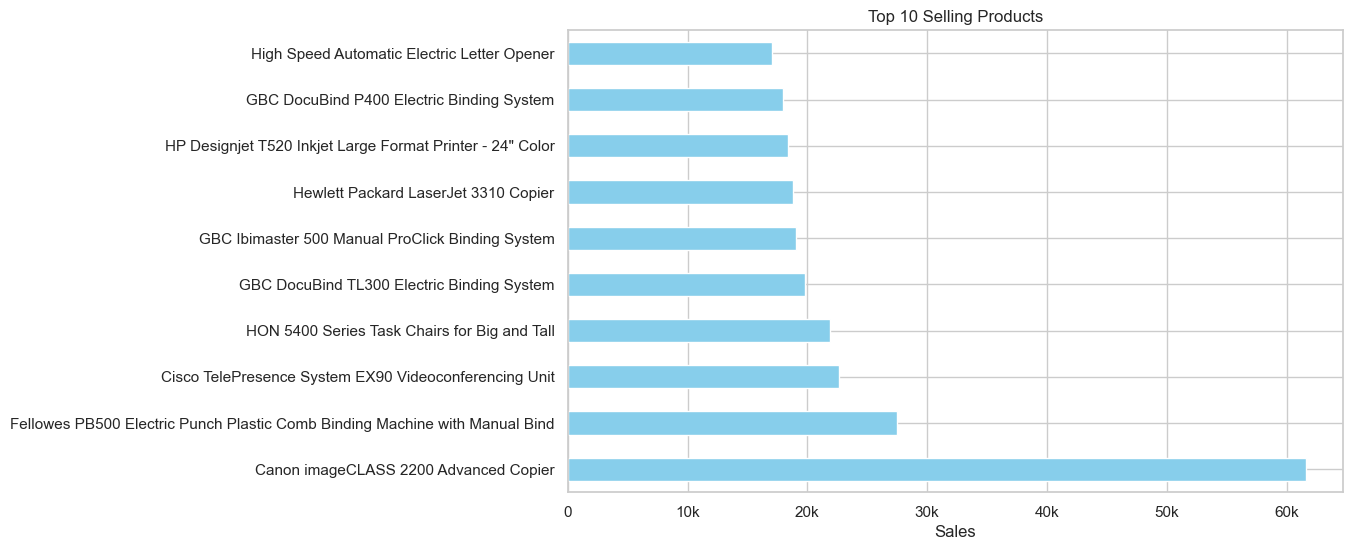

In [24]:
plt.figure(figsize=(10,6))
top_selling_prodcuts.plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Sales')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands))
plt.show()

## 6. Trend Analysis
Quarterly Sales & Profit Trend

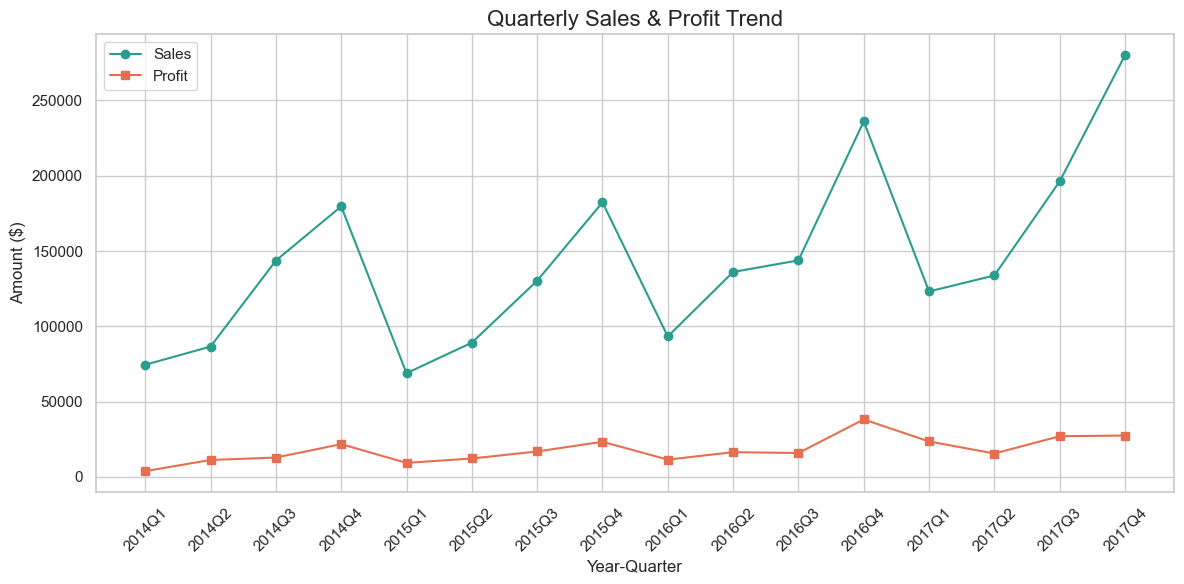

In [31]:
quarterly_sales = df.groupby("YearQuarter")["Sales"].sum()
quarterly_profit = df.groupby("YearQuarter")["Profit"].sum()

plt.figure(figsize=(12,6))

plt.plot(quarterly_sales.index.astype(str), quarterly_sales.values, marker='o', color='#2a9d8f', label='Sales')

plt.plot(quarterly_profit.index.astype(str), quarterly_profit.values, marker='s', color='#e76f51', label='Profit')

plt.title("Quarterly Sales & Profit Trend", fontsize=16)
plt.xlabel("Year-Quarter")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Monthly sales trends and state-wise sales analysis

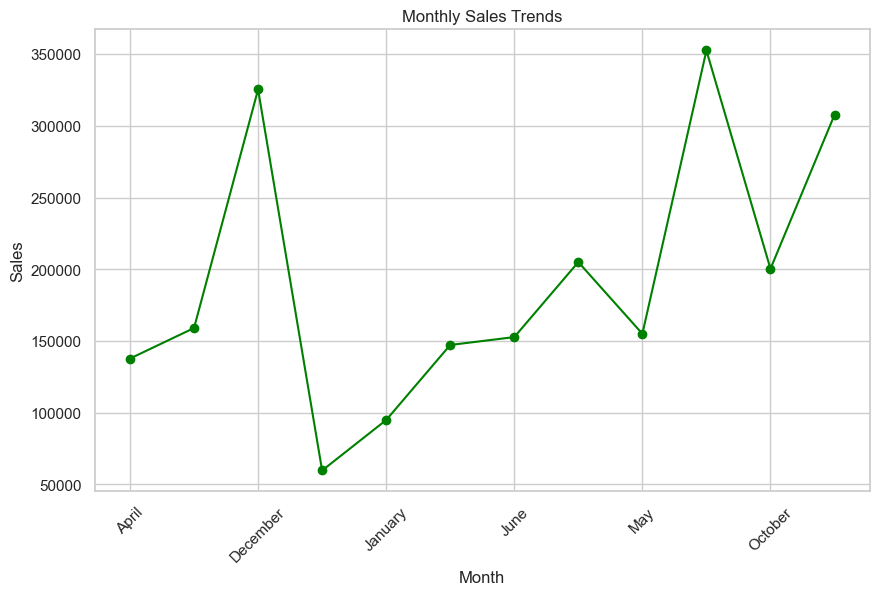

In [32]:
monthly = df.groupby('Month')['Sales'].sum().sort_index()
plt.figure(figsize=(10,6))
monthly.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Top 10 States by Sales

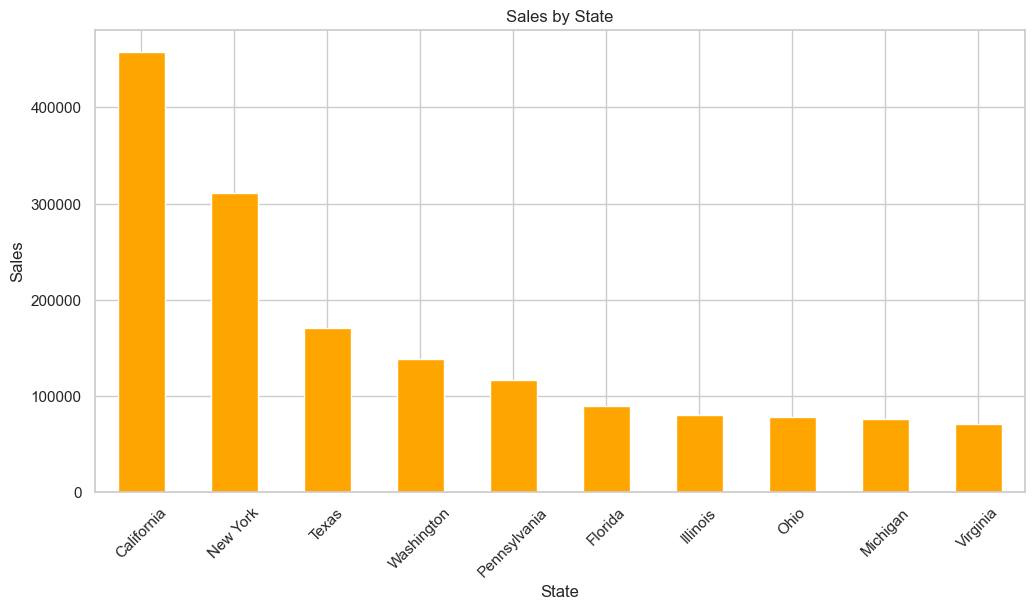

In [ ]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
state_sales.plot(kind='bar', color='orange')
plt.title('Sales by State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Sales by Region

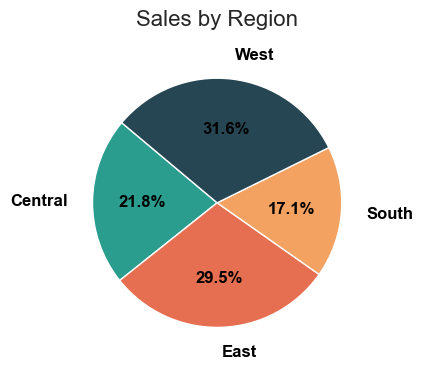

In [34]:
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(4,4))
plt.pie(
    region_sales, 
    labels=region_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#2a9d8f','#e76f51','#f4a261','#264653'],
    textprops={'color':'black', 'fontsize':12, 'fontweight':'bold'},
    labeldistance=1.2,
    pctdistance=0.6    
)

plt.title("Sales by Region", fontsize=16)
plt.tight_layout()
plt.axis('equal')
plt.show()

## 7. Insights
Summarize key insights at the end of the notebook

In [27]:
print('INSIGHTS:')
print('- Best states to sell in: ', state_sales.index[:3].tolist())
print('- Most profitable sub-categories: ', sub_categories.index[:3].tolist())
print('- Top-selling products: ', top_selling_prodcuts.index[:3].tolist())
print('- Best months to sell: ', monthly.sort_values(ascending=False).index[:2].tolist())

INSIGHTS:
- Best states to sell in:  ['California', 'New York', 'Texas']
- Most profitable sub-categories:  ['Phones', 'Chairs', 'Storage']
- Top-selling products:  ['Canon imageCLASS 2200 Advanced Copier', 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind', 'Cisco TelePresence System EX90 Videoconferencing Unit']
- Best months to sell:  ['November', 'December']
